In [3]:
import numpy as np
import pandas as pd

In [24]:
import seaborn as sns
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# AGE, GENDER POPULATION

In [75]:
pop = pd.read_csv('ACSDP1Y2019.DP05-2020-12-24T183621.csv')

In [76]:
pop.head()

,Label,SEX AND AGE!!Total population,SEX AND AGE!!Total population!!Male,SEX AND AGE!!Total population!!Female,SEX AND AGE!!Total population!!Under 5 years,SEX AND AGE!!Total population!!5 to 9 years,SEX AND AGE!!Total population!!10 to 14 years,SEX AND AGE!!Total population!!15 to 19 years,SEX AND AGE!!Total population!!20 to 24 years,SEX AND AGE!!Total population!!25 to 34 years,SEX AND AGE!!Total population!!35 to 44 years,SEX AND AGE!!Total population!!45 to 54 years,SEX AND AGE!!Total population!!55 to 59 years,SEX AND AGE!!Total population!!60 to 64 years,SEX AND AGE!!Total population!!65 to 74 years,SEX AND AGE!!Total population!!75 to 84 years,SEX AND AGE!!Total population!!85 years and over,SEX AND AGE!!Total population!!Median age (years)
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estimate,"4,903,185","2,369,611","2,533,574","286,597","294,475","317,645","326,671","317,739","637,403","605,739","609,391","321,296","331,917","505,557","264,071","84,684",39.4
2,Margin of Error,*****,"±5,813","±5,813","±4,307","±7,801","±7,375","±5,860","±6,065","±7,106","±5,786","±5,237","±6,731","±6,651","±4,115","±4,759","±3,879",±0.3
3,Percent,"4,903,185",48.3%,51.7%,5.8%,6.0%,6.5%,6.7%,6.5%,13.0%,12.4%,12.4%,6.6%,6.8%,10.3%,5.4%,1.7%,(X)
4,Percent Margin of Error,(X),±0.1,±0.1,±0.1,±0.2,±0.2,±0.1,±0.1,±0.1,±0.1,±0.1,±0.1,±0.1,±0.1,±0.1,±0.1,(X)


In [77]:
pop.columns = pop.columns.str.replace(r'SEX AND AGE!!Total population!!', '')

In [78]:
pop.columns = pop.columns.str.replace(r'SEX AND AGE!!', '')

In [79]:
mask = ~(pop.columns.isin(['Label']))

cols_to_shift = pop.columns[mask]

pop[cols_to_shift] = pop.loc[:,mask].shift(-1)

In [80]:
pop.drop(pop[pop.Label.str.contains(r'Estimate|Margin of Error|Percent|Puerto Rico')].index, inplace=True)

In [81]:
pop.reset_index(drop=True, inplace=True)

In [82]:
pop.rename(columns={"Label": "State"}, inplace=True)

In [83]:
pop.rename(columns={"Total population": "Total Population"}, inplace=True)

In [84]:
pop.head()

,State,Total Population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Median age (years)
0,Alabama,"4,903,185","2,369,611","2,533,574","286,597","294,475","317,645","326,671","317,739","637,403","605,739","609,391","321,296","331,917","505,557","264,071","84,684",39.4
1,Alaska,"731,545","380,433","351,112","50,891","52,692","49,737","46,531","47,636","117,978","93,035","87,687","48,858","45,912","61,658","22,265","6,665",35.0
2,Arizona,"7,278,717","3,620,935","3,657,782","427,707","445,512","486,413","483,546","490,999","1,001,594","898,533","853,081","445,006","439,085","751,831","424,605","130,805",38.3
3,Arkansas,"3,017,804","1,474,705","1,543,099","183,327","192,289","202,376","205,446","197,910","386,602","377,184","362,384","192,477","193,572","303,422","162,243","58,572",38.8
4,California,"39,512,223","19,640,794","19,871,429","2,377,839","2,380,762","2,629,510","2,547,449","2,638,791","6,036,052","5,298,911","4,974,817","2,461,936","2,331,158","3,391,856","1,725,842","717,300",37.0


In [85]:
pop.to_csv('pop_df.csv')

In [86]:
### import state data and merge dataframe

In [16]:
haunted = pd.read_csv('haunted_df.csv')

In [88]:
state_df = haunted.groupby(['State'])['Venue'].count().reset_index().sort_values(by = 'State', ascending=True)

In [89]:
demo_df = pd.concat([pop, state_df['Venue']],  axis=1)

In [90]:
demo_df.head()

,State,Total Population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Median age (years),Venue
0,Alabama,"4,903,185","2,369,611","2,533,574","286,597","294,475","317,645","326,671","317,739","637,403","605,739","609,391","321,296","331,917","505,557","264,071","84,684",39.4,228
1,Alaska,"731,545","380,433","351,112","50,891","52,692","49,737","46,531","47,636","117,978","93,035","87,687","48,858","45,912","61,658","22,265","6,665",35.0,32
2,Arizona,"7,278,717","3,620,935","3,657,782","427,707","445,512","486,413","483,546","490,999","1,001,594","898,533","853,081","445,006","439,085","751,831","424,605","130,805",38.3,159
3,Arkansas,"3,017,804","1,474,705","1,543,099","183,327","192,289","202,376","205,446","197,910","386,602","377,184","362,384","192,477","193,572","303,422","162,243","58,572",38.8,121
4,California,"39,512,223","19,640,794","19,871,429","2,377,839","2,380,762","2,629,510","2,547,449","2,638,791","6,036,052","5,298,911","4,974,817","2,461,936","2,331,158","3,391,856","1,725,842","717,300",37.0,1081


In [92]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Total Population    51 non-null     object
 2   Male                51 non-null     object
 3   Female              51 non-null     object
 4   Under 5 years       51 non-null     object
 5   5 to 9 years        51 non-null     object
 6   10 to 14 years      51 non-null     object
 7   15 to 19 years      51 non-null     object
 8   20 to 24 years      51 non-null     object
 9   25 to 34 years      51 non-null     object
 10  35 to 44 years      51 non-null     object
 11  45 to 54 years      51 non-null     object
 12  55 to 59 years      51 non-null     object
 13  60 to 64 years      51 non-null     object
 14  65 to 74 years      51 non-null     object
 15  75 to 84 years      51 non-null     object
 16  85 years and over   51 non-n

In [93]:
demo_df = demo_df.replace({',':''}, regex=True)

In [94]:
demo_df.head()

,State,Total Population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Median age (years),Venue
0,Alabama,4903185,2369611,2533574,286597,294475,317645,326671,317739,637403,605739,609391,321296,331917,505557,264071,84684,39.4,228
1,Alaska,731545,380433,351112,50891,52692,49737,46531,47636,117978,93035,87687,48858,45912,61658,22265,6665,35.0,32
2,Arizona,7278717,3620935,3657782,427707,445512,486413,483546,490999,1001594,898533,853081,445006,439085,751831,424605,130805,38.3,159
3,Arkansas,3017804,1474705,1543099,183327,192289,202376,205446,197910,386602,377184,362384,192477,193572,303422,162243,58572,38.8,121
4,California,39512223,19640794,19871429,2377839,2380762,2629510,2547449,2638791,6036052,5298911,4974817,2461936,2331158,3391856,1725842,717300,37.0,1081


In [95]:
demo_df = demo_df.apply(pd.to_numeric, errors='coerce')

In [96]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               0 non-null      float64
 1   Total Population    51 non-null     int64  
 2   Male                51 non-null     int64  
 3   Female              51 non-null     int64  
 4   Under 5 years       51 non-null     int64  
 5   5 to 9 years        51 non-null     int64  
 6   10 to 14 years      51 non-null     int64  
 7   15 to 19 years      51 non-null     int64  
 8   20 to 24 years      51 non-null     int64  
 9   25 to 34 years      51 non-null     int64  
 10  35 to 44 years      51 non-null     int64  
 11  45 to 54 years      51 non-null     int64  
 12  55 to 59 years      51 non-null     int64  
 13  60 to 64 years      51 non-null     int64  
 14  65 to 74 years      51 non-null     int64  
 15  75 to 84 years      51 non-null     int64  
 16  85 years a

In [97]:
demo_df.drop(['State'], axis=1, inplace=True)

In [99]:
demo_df.rename(columns={"Total population": "Total Population", "Median age (years)": "Median Age (Years)"}, inplace=True)

In [100]:
pop_stat = demo_df.join(pop['State'])

In [101]:
pop_stat.to_csv('pop_stat.csv')

In [102]:
import seaborn as sns
%matplotlib inline

In [ ]:
pp = sns.pairplot(data=pop_stat,
                  kind='reg',
                  y_vars=["Venue"],
                  x_vars=["Male", 
                          "Female"],
                 aspect=0.6,height=8)

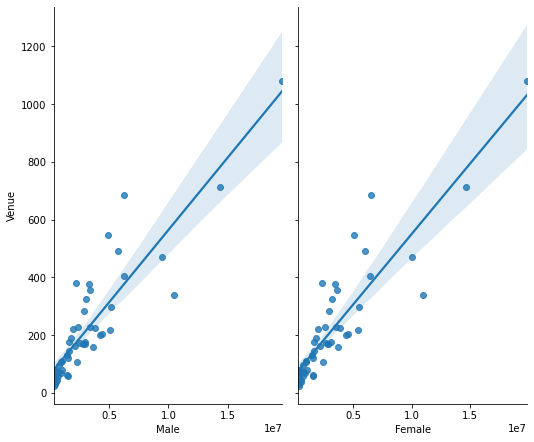

In [147]:
pp = sns.pairplot(data=pop_stat,
                  kind='reg',
                  y_vars=["Venue"],
                  x_vars=["Male", 
                          "Female"],
                 aspect=0.6,height=6)

In [104]:
#sns.pairplot(demo_df)

In [105]:
"""sns.set(rc={'figure.figsize':(12,12),
            'figure.dpi':500})"""

"sns.set(rc={'figure.figsize':(12,12),\n            'figure.dpi':500})"

In [106]:
"""sns.set_color_codes("pastel")"""

'sns.set_color_codes("pastel")'

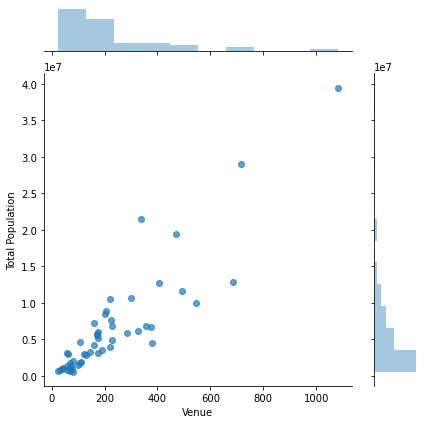

In [107]:
sns.jointplot(x='Venue',y='Total Population',data=demo_df,kind='scatter', space=.5,alpha=.7)

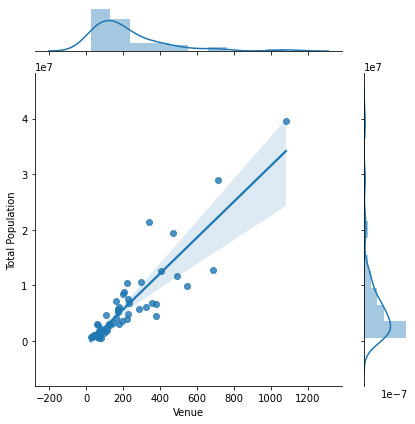

In [108]:
sns.jointplot(x='Venue',y='Total Population',data=demo_df,kind='reg', space=0.5)

In [109]:
column_1 = demo_df['Venue']
column_2 = demo_df['Total Population']
correlation1 = column_1.corr(column_2)
print(correlation1)

0.8928391341983317


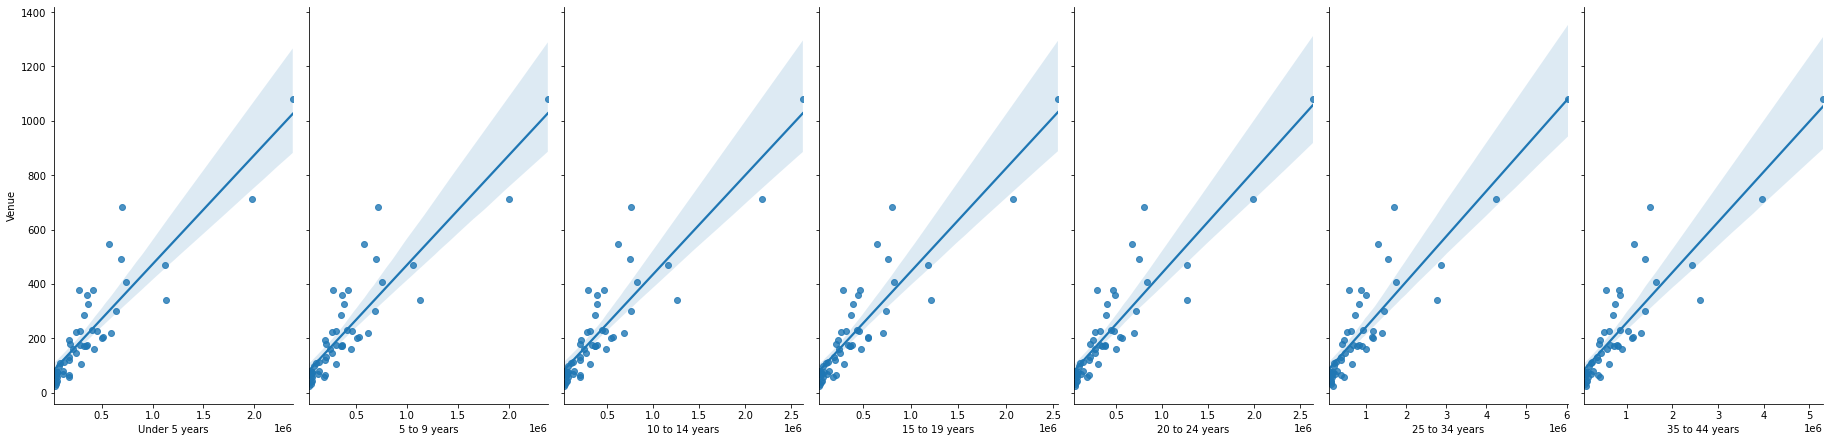

In [157]:
pp = sns.pairplot(data=demo_df,
                  kind='reg',
                  y_vars=["Venue"],
                  x_vars=["Under 5 years", 
                          "5 to 9 years", 
                          "10 to 14 years", 
                          "15 to 19 years", 
                          "20 to 24 years", 
                          "25 to 34 years", 
                          "35 to 44 years"],
                 aspect=0.6,height=6)

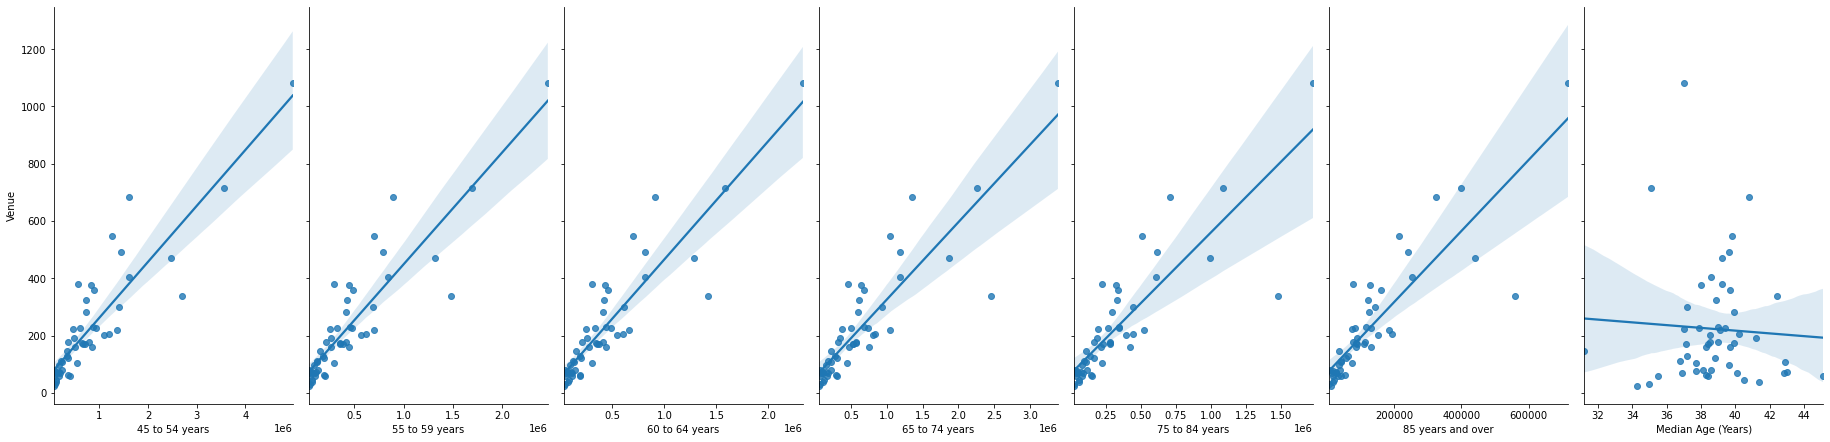

In [155]:
pp = sns.pairplot(data=demo_df,
                  kind='reg',
                  y_vars=["Venue"],
                  x_vars=["45 to 54 years", 
                          "55 to 59 years", 
                          "60 to 64 years", 
                          "65 to 74 years", 
                          "75 to 84 years", 
                          "85 years and over", 
                          "Median Age (Years)"],
                 aspect=0.6,height=6)

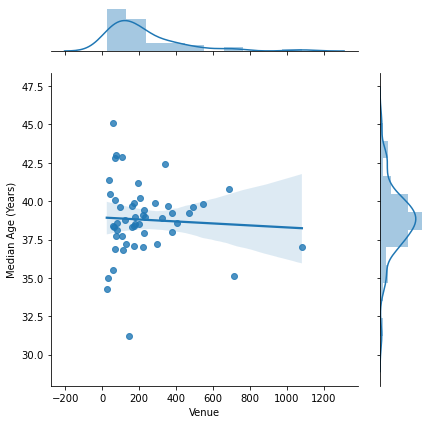

In [110]:
sns.jointplot(x='Venue',y='Median Age (Years)',data=demo_df,kind='reg', space=0.5)

In [158]:
column_1 = demo_df['Venue']
column_2 = demo_df['Median Age (Years)']
correlation2 = column_1.corr(column_2)
print(correlation2)

-0.055848152971384506


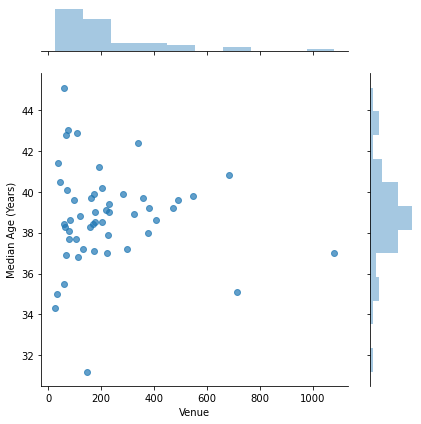

In [111]:
sns.jointplot(x='Venue',y='Median Age (Years)',data=demo_df,kind='scatter', space=0.5,alpha=.7)

In [112]:
column_1 = demo_df['Venue']
column_2 = demo_df['Median Age (Years)']
correlation2 = column_1.corr(column_2)
print(correlation2)

-0.055848152971384506


In [113]:
demo_df['Children'] = demo_df['Under 5 years'] + demo_df['5 to 9 years'] + demo_df['10 to 14 years']

In [114]:
demo_df['Youth'] = demo_df['15 to 19 years'] + demo_df['20 to 24 years']

In [115]:
demo_df['Adult'] = demo_df['25 to 34 years'] + demo_df['35 to 44 years'] + demo_df['45 to 54 years'] + demo_df['55 to 59 years'] + demo_df['60 to 64 years']

In [116]:
demo_df['Senior'] = demo_df['65 to 74 years'] + demo_df['75 to 84 years'] + demo_df['85 years and over']

In [117]:
demo_age = demo_df[['Venue', 'Children', 'Youth', 'Adult', 'Senior']]

In [118]:
demo_age.head()

,Venue,Children,Youth,Adult,Senior
0,228,898717,644410,2505746,854312
1,32,153320,94167,393470,90588
2,159,1359632,974545,3637299,1307241
3,121,577992,403356,1512219,524237
4,1081,7388111,5186240,21102874,5834998


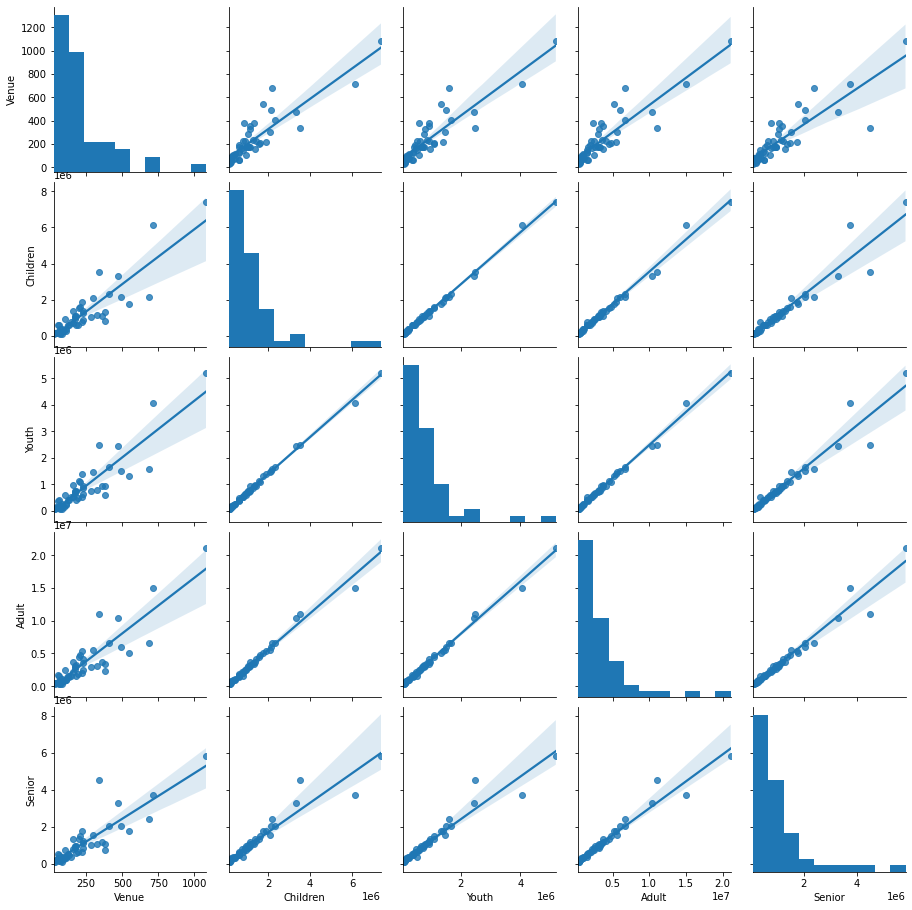

In [119]:
sns.pairplot(demo_age, kind='reg')

In [1]:
# EDUCATIONAL DATA

In [4]:
over25 = pd.read_csv('ACSST1Y2019.S1501-2020-12-26T152752.csv')

In [5]:
over25.head()

,Label,AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher,AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOXHEAD1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estimate,"3,360,058","130,320","302,753","1,039,241","700,473","301,914","547,975","337,382","2,926,985","885,357"
3,Margin of Error,"±5,792","±7,180","±10,699","±15,811","±14,036","±9,416","±14,065","±10,377","±13,168","±18,293"
4,BOXHEAD2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
over25.columns = over25.columns.str.replace(r'AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!', '')

In [7]:
over25

,Label,AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,High school graduate or higher,Bachelor's degree or higher
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOXHEAD1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estimate,"3,360,058","130,320","302,753","1,039,241","700,473","301,914","547,975","337,382","2,926,985","885,357"
3,Margin of Error,"±5,792","±7,180","±10,699","±15,811","±14,036","±9,416","±14,065","±10,377","±13,168","±18,293"
4,BOXHEAD2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
983,Estimate,"1,238,365","156,166","78,255","318,157","141,229","154,167","277,322","113,069","1,003,944","390,391"
984,Margin of Error,"±2,202","±6,046","±4,631","±8,128","±5,851","±7,535","±8,553","±6,762","±6,696","±9,852"
985,BOXHEAD6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,Estimate,(X),12.6%,6.3%,25.7%,11.4%,12.4%,22.4%,9.1%,81.1%,31.5%


In [8]:
over25.drop('AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over', axis=1, inplace=True)

In [9]:
mask = ~(over25.columns.isin(['Label']))

cols_to_shift = over25.columns[mask]

over25[cols_to_shift] = over25.loc[:,mask].shift(-2)

In [10]:
over25.head()

,Label,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,High school graduate or higher,Bachelor's degree or higher
0,Alabama,"130,320","302,753","1,039,241","700,473","301,914","547,975","337,382","2,926,985","885,357"
1,BOXHEAD1,"±7,180","±10,699","±15,811","±14,036","±9,416","±14,065","±10,377","±13,168","±18,293"
2,Estimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Margin of Error,3.9%,9.0%,30.9%,20.8%,9.0%,16.3%,10.0%,87.1%,26.3%
4,BOXHEAD2,±0.2,±0.3,±0.5,±0.4,±0.3,±0.4,±0.3,±0.4,±0.5


In [11]:
over25.drop(over25[over25.Label.str.contains(r'BOXHEAD|Estimate|Margin|Puerto Rico')].index, inplace=True)

In [12]:
over25.head()

,Label,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,High school graduate or higher,Bachelor's degree or higher
0,Alabama,"130,320","302,753","1,039,241","700,473","301,914","547,975","337,382","2,926,985","885,357"
19,Alaska,"10,424","20,666","139,156","124,261","43,394","89,583","56,574","452,968","146,157"
38,Arizona,"252,459","360,539","1,170,685","1,236,845","431,854","931,038","561,120","4,331,542","1,492,158"
57,Arkansas,"94,376","160,617","710,306","444,052","151,738","307,185","168,182","1,781,463","475,367"
76,California,"2,346,235","1,955,278","5,546,711","5,542,372","2,118,792","5,889,724","3,538,760","22,636,359","9,428,484"


In [13]:
over25.reset_index(drop=True, inplace=True)

In [14]:
over25.rename(columns={"Label": "State"}, inplace=True)

In [18]:
# GROUPBY

haunted1 = haunted.groupby(['State'])['Venue'].count().reset_index().sort_values(by = 'State', ascending=True)

In [19]:
over25_state = pd.concat([over25, haunted1['Venue']],  axis=1)

In [20]:
over25_state.head()

,State,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,High school graduate or higher,Bachelor's degree or higher,Venue
0,Alabama,"130,320","302,753","1,039,241","700,473","301,914","547,975","337,382","2,926,985","885,357",228
1,Alaska,"10,424","20,666","139,156","124,261","43,394","89,583","56,574","452,968","146,157",32
2,Arizona,"252,459","360,539","1,170,685","1,236,845","431,854","931,038","561,120","4,331,542","1,492,158",159
3,Arkansas,"94,376","160,617","710,306","444,052","151,738","307,185","168,182","1,781,463","475,367",121
4,California,"2,346,235","1,955,278","5,546,711","5,542,372","2,118,792","5,889,724","3,538,760","22,636,359","9,428,484",1081


In [21]:
#CONVERT STR TO NUMERIC DATA

In [22]:
over25_state = over25_state.replace({',':''}, regex=True)

In [23]:
over25_state = over25_state.apply(pd.to_numeric, errors='coerce')

In [25]:
over25_state.drop(['State'], axis=1, inplace=True)

In [26]:
sns.set_style("whitegrid", {'axes.grid' : False})

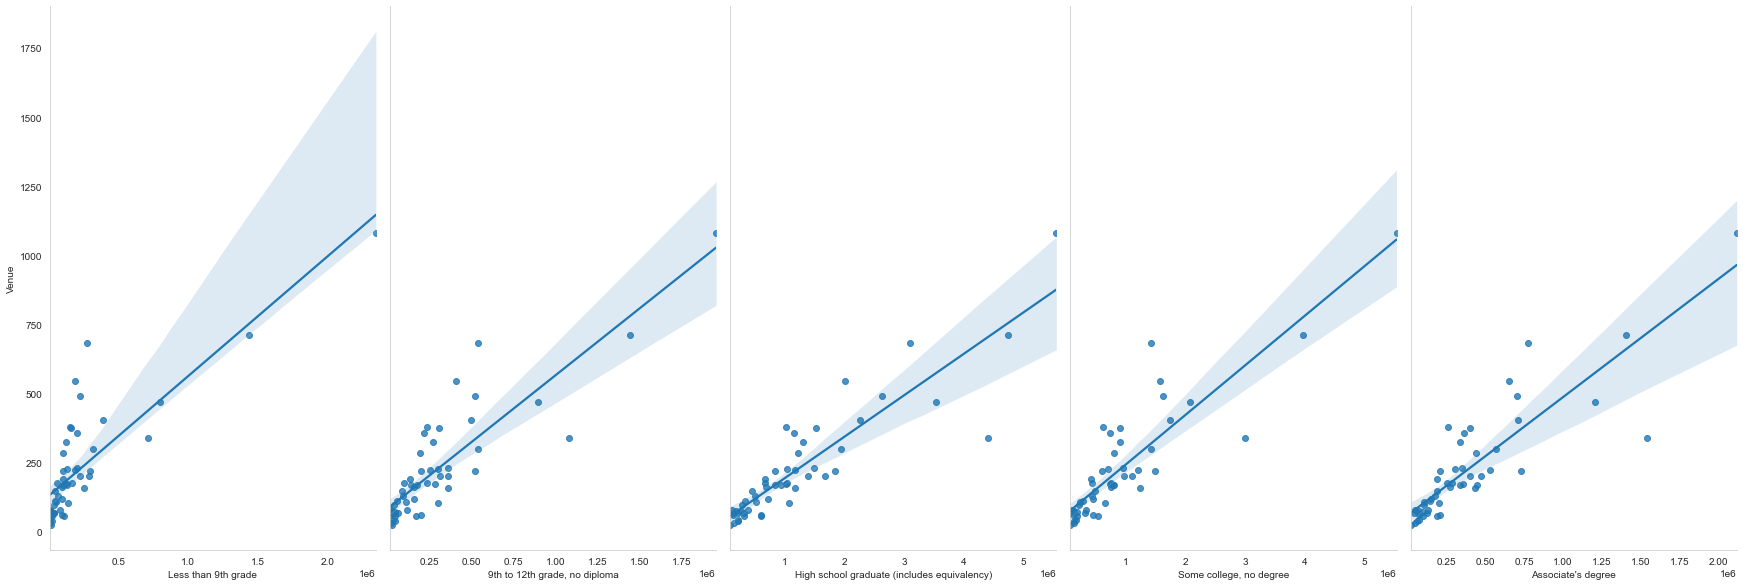

In [27]:
pp = sns.pairplot(data=over25_state,
                  kind='reg',
                  y_vars=["Venue"],
                  x_vars=["Less than 9th grade",
                          "9th to 12th grade, no diploma", 
                          "High school graduate (includes equivalency)", 
                          "Some college, no degree",
                          "Associate's degree"
                          ],
                 aspect=.6,height=8)

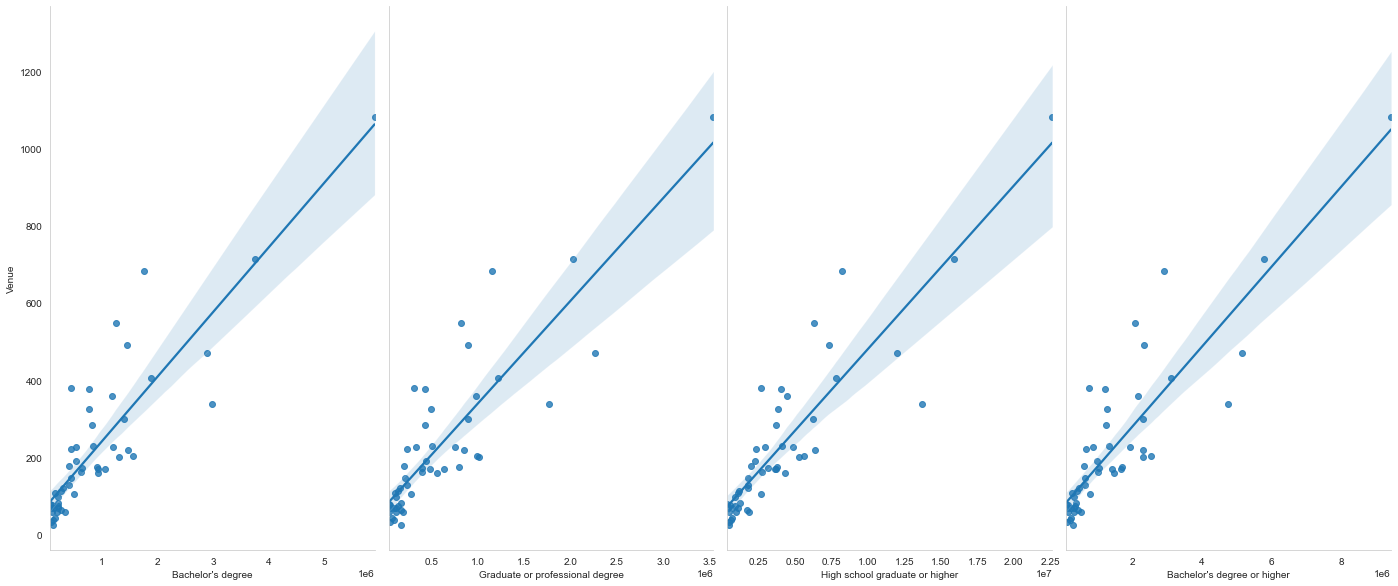

In [28]:
pp = sns.pairplot(data=over25_state,
                  kind='reg',
                  y_vars=["Venue"],
                  x_vars=[ 
                          "Bachelor's degree", 
                          "Graduate or professional degree", 
                          "High school graduate or higher", 
                          "Bachelor's degree or higher"],
                 aspect=.6,height=8)

In [29]:
column_1a = over25_state['Venue']
column_1b = over25_state['Less than 9th grade']
correlation1 = column_1a.corr(column_1b)
print(correlation1)

column_2a = over25_state['Venue']
column_2b = over25_state["9th to 12th grade, no diploma"]
correlation2 = column_2a.corr(column_2b)
print(correlation2)

column_3a = over25_state['Venue']
column_3b = over25_state["Bachelor's degree or higher"]
correlation3 = column_3a.corr(column_3b)
print(correlation3)

0.8234719668796708
0.865986275803346
0.8754784024599754


In [30]:
# INCOME DATA

In [31]:
income = pd.read_csv('ACSST1Y2019.S1901-2020-12-26T151633.csv')

In [32]:
income.head()

,Label,Median income (dollars),Mean income (dollars)
0,Alabama,NaN,NaN
1,BOXHEAD1,NaN,NaN
2,Estimate,"51,734","71,478"
3,Margin of Error,±600,±864
4,BOXHEAD2,NaN,NaN


In [33]:
mask = ~(income.columns.isin(['Label']))

cols_to_shift = income.columns[mask]

income[cols_to_shift] = income.loc[:,mask].shift(-2)

In [34]:
income.drop(income[income.Label.str.contains(r'BOXHEAD|Estimate|Margin|Puerto Rico')].index, inplace=True)

In [35]:
income.reset_index(drop=True, inplace=True)

In [36]:
income.rename(columns={"Label": "State"}, inplace=True)

In [37]:
income.rename(columns={"Median income (dollars)": "Median Income", 
                       "Mean income (dollars)": "Mean Income" }, inplace=True)

In [38]:
income_st = pd.concat([income, haunted1['Venue']],  axis=1)

In [39]:
income_st

,State,Median Income,Mean Income,Venue
0,Alabama,"51,734","71,478",228
1,Alaska,"75,463","98,504",32
2,Arizona,"62,055","84,438",159
3,Arkansas,"48,952","68,219",121
4,California,"80,440","113,563",1081
5,Colorado,"77,127","103,518",171
6,Connecticut,"78,833","114,630",192
7,Delaware,"70,176","92,445",38
8,District of Columbia,"92,266","135,369",25
9,Florida,"59,227","83,883",339


In [40]:
income_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          51 non-null     object
 1   Median Income  51 non-null     object
 2   Mean Income    51 non-null     object
 3   Venue          51 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [41]:
income_st = income_st.replace({',':''}, regex=True)
income_st = income_st.apply(pd.to_numeric, errors='coerce')

In [42]:
income_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          0 non-null      float64
 1   Median Income  51 non-null     int64  
 2   Mean Income    51 non-null     int64  
 3   Venue          51 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.7 KB


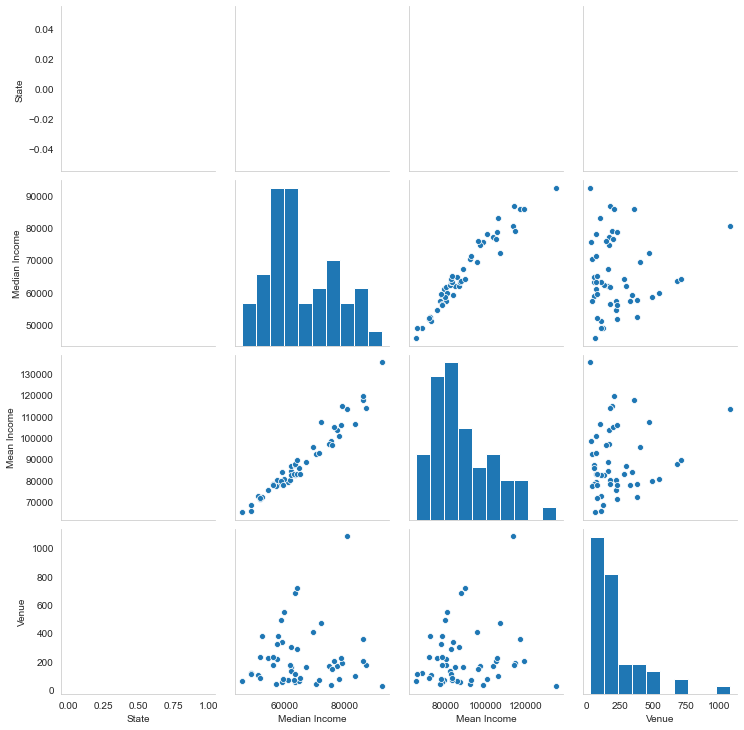

In [43]:
sns.pairplot(income_st)

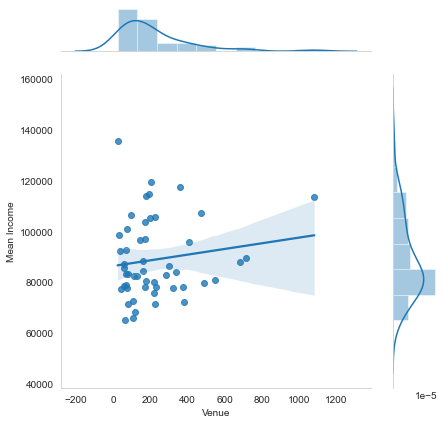

In [44]:
sns.jointplot(x='Venue',y='Mean Income',data=income_st,kind='reg', space=.5)

In [45]:
column_1 = income_st['Venue']
column_2 = income_st['Mean Income']
correlation1 = column_1.corr(column_2)
print(correlation1)

0.1470635208754131


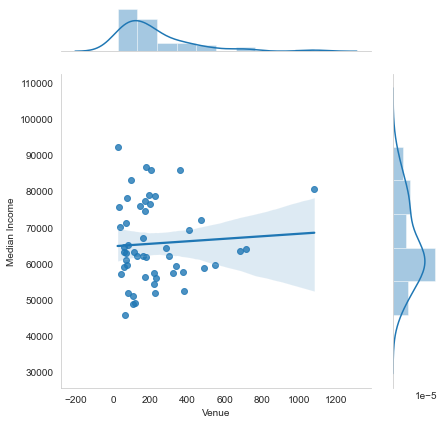

In [46]:
sns.jointplot(x='Venue',y='Median Income',data=income_st,kind='reg', space=.5)

In [47]:
column_1 = income_st['Venue']
column_2 = income_st['Median Income']
correlation2 = column_1.corr(column_2)
print(correlation2)

0.06303920326945865


In [48]:
#END PART II